<a href="https://colab.research.google.com/github/myozaw5288/git/blob/master/%D0%94%D0%972(%D0%9F%D0%A0%D0%98%D0%A1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
os.listdir('/content/drive/MyDrive/img_data')

['people', 'car', 'dog']

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
loc0 = '/content/drive/MyDrive/img_data/car'
loc1 = '/content/drive/MyDrive/img_data/dog'
loc2 = '/content/drive/MyDrive/img_data/people'

features = []
import cv2
from tqdm import tqdm

for img in tqdm(os.listdir(loc0)):
    im = cv2.imread(os.path.join(loc0,img),0)
    im = cv2.resize(im,(70,70))
    features.append(im)
for img in tqdm(os.listdir(loc1)):
    im = cv2.imread(os.path.join(loc1,img),0)
    im = cv2.resize(im,(70,70))
    features.append(im)
for img in tqdm(os.listdir(loc2)):
    im = cv2.imread(os.path.join(loc2,img),0)
    im = cv2.resize(im,(70,70))
    features.append(im)

100%|██████████| 100/100 [00:00<00:00, 267.47it/s]


In [6]:
labels = []
for img in tqdm(os.listdir(loc0)):
    labels.append(0)

for img in tqdm(os.listdir(loc1)):
    labels.append(1)

for img in tqdm(os.listdir(loc2)):
    labels.append(2)

100%|██████████| 100/100 [00:00<00:00, 65576.99it/s]


In [7]:
import numpy as np

X = np.array(features).reshape(-1,70,70,1)
Y = np.array(labels)

print(X.shape)
print(Y.shape)

(301, 70, 70, 1)
(301,)


In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Convolution2D,MaxPooling2D,Flatten,Dropout
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X,Y)

xtrain_n = xtrain/xtrain.max()
xtest_n = xtest/xtest.max()

ytrain_h = np_utils.to_categorical(ytrain)

ytest_h = np_utils.to_categorical(ytest)

In [9]:
model = Sequential()
model.add(Convolution2D(32,(3,3), padding = 'same', input_shape = xtrain_n.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Convolution2D(64,(3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Convolution2D(128,(3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Convolution2D(256,(3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Convolution2D(512,(3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Convolution2D(1024,(3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(3,activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

history=model.fit(xtrain_n,ytrain_h,epochs=25,
          validation_data=(xtest_n,ytest_h))

Epoch 1/25
8/8 [==============================] - 34s 159ms/step - loss: 1.0995 - accuracy: 0.3418 - val_loss: 1.0984 - val_accuracy: 0.3553
Epoch 2/25
8/8 [==============================] - 0s 20ms/step - loss: 1.1009 - accuracy: 0.3152 - val_loss: 1.0984 - val_accuracy: 0.3553
Epoch 3/25
8/8 [==============================] - 0s 20ms/step - loss: 1.0950 - accuracy: 0.3365 - val_loss: 1.0955 - val_accuracy: 0.3553
Epoch 4/25
8/8 [==============================] - 0s 20ms/step - loss: 1.0944 - accuracy: 0.3690 - val_loss: 1.0939 - val_accuracy: 0.3816
Epoch 5/25
8/8 [==============================] - 0s 20ms/step - loss: 1.0995 - accuracy: 0.3130 - val_loss: 1.0931 - val_accuracy: 0.3816
Epoch 6/25
8/8 [==============================] - 0s 20ms/step - loss: 1.0993 - accuracy: 0.3308 - val_loss: 1.0980 - val_accuracy: 0.3816
Epoch 7/25
8/8 [==============================] - 0s 20ms/step - loss: 1.0978 - accuracy: 0.3292 - val_loss: 1.0978 - val_accuracy: 0.3553
Epoch 8/25
8/8 [=========

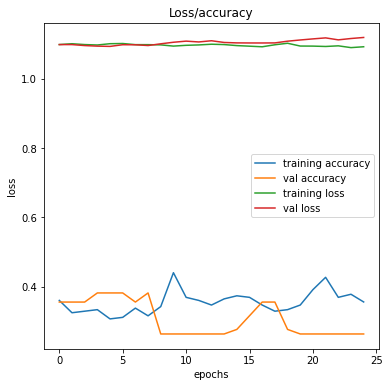

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6,6))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss/accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [12]:
model.evaluate(xtrain_n,ytrain_h)

8/8 [==============================] - 0s 7ms/step - loss: 1.0977 - accuracy: 0.3556


[1.0977413654327393, 0.35555556416511536]

In [13]:
model.evaluate(xtest_n,ytest_h)

3/3 [==============================] - 0s 8ms/step - loss: 1.1189 - accuracy: 0.2632


[1.1189135313034058, 0.2631579041481018]

In [14]:
ytest_pred = []
for rows in model.predict(xtest_n):
    ytest_pred.append(np.argmax(rows))

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ytest_pred)

array([[ 0,  0, 29],
       [ 0,  0, 27],
       [ 0,  0, 20]])